<a href="https://colab.research.google.com/github/Ravenha/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Bethany_DS_Unit_1_Sprint_Challenge_2_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [3]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [16]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [130]:
merged = pd.concat([population, cell_phones])
print(merged.shape)
merged.head()

(68512, 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,cell_phones_total,geo,population_total,time
0,NaN,afg,3280000.0,1800
1,NaN,afg,3280000.0,1801
2,NaN,afg,3280000.0,1802
3,NaN,afg,3280000.0,1803
4,NaN,afg,3280000.0,1804


Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [199]:
final = pd.merge(merged, geo_country_codes[['country','geo']], how='left', on='geo')
final.head()

,cell_phones_total,geo,population_total,time,country
0,nan,afg,"3,280,000.0",1800,Afghanistan
1,nan,afg,"3,280,000.0",1801,Afghanistan
2,nan,afg,"3,280,000.0",1802,Afghanistan
3,nan,afg,"3,280,000.0",1803,Afghanistan
4,nan,afg,"3,280,000.0",1804,Afghanistan


In [137]:
final.isna().sum()

cell_phones_total    59297
geo                      0
population_total      9215
time                     0
country                  0
dtype: int64

In [0]:
final.fillna(0, inplace=True)

In [146]:
final.head(10)

,cell_phones_total,geo,population_total,time,country
0,0.0,afg,3280000.0,1800,Afghanistan
1,0.0,afg,3280000.0,1801,Afghanistan
2,0.0,afg,3280000.0,1802,Afghanistan
3,0.0,afg,3280000.0,1803,Afghanistan
4,0.0,afg,3280000.0,1804,Afghanistan
5,0.0,afg,3280000.0,1805,Afghanistan
6,0.0,afg,3280000.0,1806,Afghanistan
7,0.0,afg,3280000.0,1807,Afghanistan
8,0.0,afg,3280000.0,1808,Afghanistan
9,0.0,afg,3280000.0,1809,Afghanistan


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [147]:
final.columns

Index(['cell_phones_total', 'geo', 'population_total', 'time', 'country'], dtype='object')

In [148]:
table1 = final.reset_index()
table1.head()

,index,cell_phones_total,geo,population_total,time,country
0,0,0.0,afg,3280000.0,1800,Afghanistan
1,1,0.0,afg,3280000.0,1801,Afghanistan
2,2,0.0,afg,3280000.0,1802,Afghanistan
3,3,0.0,afg,3280000.0,1803,Afghanistan
4,4,0.0,afg,3280000.0,1804,Afghanistan


In [0]:
import numpy as np

In [156]:
final['cell_phones_total/population_total'] = np.where(final['population_total'] < 1, final['population_total'], final['cell_phones_total']/final['population_total'])
print(final.head())

   cell_phones_total  geo  ...      country  cell_phones_total/population_total
0                0.0  afg  ...  Afghanistan                                 0.0
1                0.0  afg  ...  Afghanistan                                 0.0
2                0.0  afg  ...  Afghanistan                                 0.0
3                0.0  afg  ...  Afghanistan                                 0.0
4                0.0  afg  ...  Afghanistan                                 0.0

[5 rows x 6 columns]


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [158]:
table1['geo'] = table1['geo'].str.upper()
table1.head(10)

,index,cell_phones_total,geo,population_total,time,country
0,0,0.0,AFG,3280000.0,1800,Afghanistan
1,1,0.0,AFG,3280000.0,1801,Afghanistan
2,2,0.0,AFG,3280000.0,1802,Afghanistan
3,3,0.0,AFG,3280000.0,1803,Afghanistan
4,4,0.0,AFG,3280000.0,1804,Afghanistan
5,5,0.0,AFG,3280000.0,1805,Afghanistan
6,6,0.0,AFG,3280000.0,1806,Afghanistan
7,7,0.0,AFG,3280000.0,1807,Afghanistan
8,8,0.0,AFG,3280000.0,1808,Afghanistan
9,9,0.0,AFG,3280000.0,1809,Afghanistan


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [160]:
table1.describe()

,index,cell_phones_total,population_total,time
count,68512.000000,6.851200e+04,6.851200e+04,68512.000000
mean,34255.500000,1.130252e+06,2.000724e+07,1955.924991
std,19777.855158,1.995788e+07,9.338641e+07,82.388329
min,0.000000,0.000000e+00,0.000000e+00,1800.000000
25%,17127.750000,0.000000e+00,9.538775e+04,1886.000000
50%,34255.500000,0.000000e+00,1.688538e+06,1970.000000
75%,51383.250000,0.000000e+00,8.581238e+06,2015.000000
max,68511.000000,1.474097e+09,1.678656e+09,2100.000000


In [162]:
table1.describe(include='all')

,index,cell_phones_total,geo,population_total,time,country
count,68512.000000,6.851200e+04,68512,6.851200e+04,68512.000000,68512
unique,NaN,NaN,216,NaN,NaN,216
top,NaN,NaN,NPL,NaN,NaN,Luxembourg
freq,NaN,NaN,347,NaN,NaN,347
mean,34255.500000,1.130252e+06,NaN,2.000724e+07,1955.924991,NaN
std,19777.855158,1.995788e+07,NaN,9.338641e+07,82.388329,NaN
min,0.000000,0.000000e+00,NaN,0.000000e+00,1800.000000,NaN
25%,17127.750000,0.000000e+00,NaN,9.538775e+04,1886.000000,NaN
50%,34255.500000,0.000000e+00,NaN,1.688538e+06,1970.000000,NaN
75%,51383.250000,0.000000e+00,NaN,8.581238e+06,2015.000000,NaN


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [196]:
table1.head(5)

,index,cell_phones_total,geo,population_total,time,country
0,0,0.0,AFG,"3,280,000.0",1800,Afghanistan
1,1,0.0,AFG,"3,280,000.0",1801,Afghanistan
2,2,0.0,AFG,"3,280,000.0",1802,Afghanistan
3,3,0.0,AFG,"3,280,000.0",1803,Afghanistan
4,4,0.0,AFG,"3,280,000.0",1804,Afghanistan


In [172]:
table1.iloc[:,1].tail(5)

68507   13,633,167.0
68508   11,798,652.0
68509   12,757,410.0
68510   12,878,926.0
68511   14,092,104.0
Name: cell_phones_total, dtype: float64

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [201]:
table1.iloc[67960:68002, 1:5]

,cell_phones_total,geo,population_total,time
67960,0.0,USA,0.0,1960
67961,0.0,USA,0.0,1965
67962,0.0,USA,0.0,1970
67963,0.0,USA,0.0,1975
67964,0.0,USA,0.0,1976
67965,0.0,USA,0.0,1977
67966,0.0,USA,0.0,1978
67967,0.0,USA,0.0,1979
67968,0.0,USA,0.0,1980
67969,"91,600.0",USA,0.0,1984


2011

### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [204]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [235]:
pd.crosstab([df.Occupation], df.Year,  margins=True, normalize='columns')

Year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,All
Occupation,,,,,,,,,,,,,,,,,,
"Acting, Comedy & Music",0.9036144578313253,0.7396449704142012,0.7261146496815286,0.6226415094339622,0.5602409638554217,0.38414634146341464,0.37037037037037035,0.36024844720496896,0.2553191489361702,0.2073170731707317,0.2085889570552147,0.3515151515151515,0.3374233128834356,0.2682926829268293,0.42771084337349397,0.39263803680981596,0.45,0.4467137021908652
Government and Politics,0.012048192771084338,0.08284023668639054,0.03821656050955414,0.06918238993710692,0.10240963855421686,0.22560975609756098,0.16049382716049382,0.19254658385093168,0.1702127659574468,0.20121951219512196,0.2085889570552147,0.18181818181818182,0.1656441717791411,0.20121951219512196,0.12650602409638553,0.12883435582822086,0.17,0.14259190493873003
Media,0.06626506024096386,0.1242603550295858,0.19745222929936307,0.2641509433962264,0.2469879518072289,0.27439024390243905,0.3333333333333333,0.2919254658385093,0.3333333333333333,0.4695121951219512,0.3619631901840491,0.30303030303030304,0.3128834355828221,0.3170731707317073,0.3072289156626506,0.32515337423312884,0.24,0.28072781284812476
Other,0.018072289156626505,0.05325443786982249,0.03821656050955414,0.0440251572327044,0.09036144578313253,0.11585365853658537,0.13580246913580246,0.15527950310559005,0.24113475177304963,0.12195121951219512,0.22085889570552147,0.16363636363636364,0.18404907975460122,0.21341463414634146,0.13855421686746988,0.15337423312883436,0.14,0.12996658002227998


### Part 2 — Recreate this explanatory visualization:

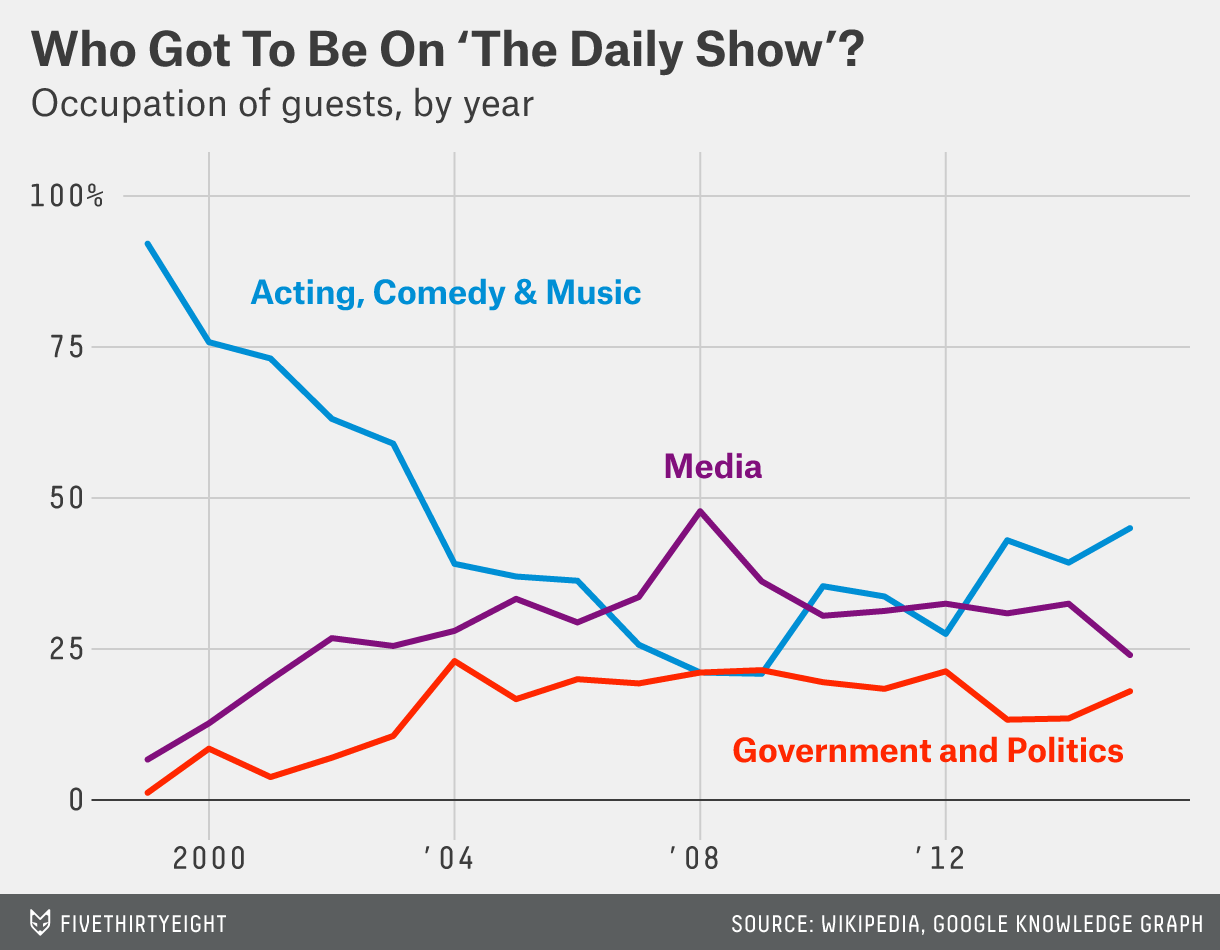

In [236]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [0]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

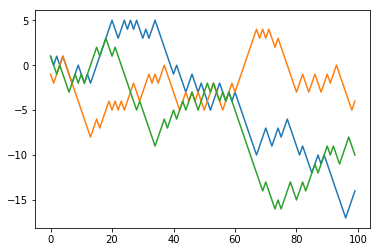

In [297]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

plt.figure(); df.plot(); plt.legend(loc='best')